# U.S. Medical Insurance Costs

## Clarifications in Regards to the Data

Before getting into the analysis, there are a few points I'd like to make to keep in consideration both while analyzing and viewing the findings.

1. U.S. insurance companies take BMI (body mass index) into consideration when valuating insurance costs. Due to that reason, we've provided a few breakdowns related to BMI but would like to clarify that BMI is not an accurate predictor of health since quantitative measures that reduce complex phenomena down to a single number are far too generalized. Because of this, we'd encourage to keep in mind any skepticism related to BMI and analysis found using it.

2. The data provided does not take into account trans and non-binary individuals. Keep this in mind while viewing any data involving the rigid male female binary used.

## Data Preparation

In [341]:
# All of our import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [342]:
# Read our insurance data into a data frame
insurance_df = pd.read_csv('insurance.csv')
insurance_df['bmi'] = insurance_df['bmi'].round(2)
insurance_df['charges'] = insurance_df['charges'].round(2)

In [343]:
# Add age group to the DataFrame
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]
labels = ['<20', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90+']
insurance_df['age_group'] = pd.cut(insurance_df['age'], bins=bins, labels=labels, right=False)

In [344]:
# Add bmi grouping to the dataframe
bins = [0, 18.5, 25, 30, 35, 40, float('inf')]
labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
insurance_df['bmi_group'] = pd.cut(insurance_df['bmi'], bins=bins, labels=labels)

print(insurance_df.head())

   age     sex    bmi  children smoker     region   charges age_group  \
0   19  female  27.90         0    yes  southwest  16884.92       <20   
1   18    male  33.77         1     no  southeast   1725.55       <20   
2   28    male  33.00         3     no  southeast   4449.46       20s   
3   33    male  22.70         0     no  northwest  21984.47       30s   
4   32    male  28.88         0     no  northwest   3866.86       30s   

       bmi_group  
0     Overweight  
1        Obese I  
2        Obese I  
3  Normal Weight  
4     Overweight  


## Feature Analysis

##### Age Distribution in Our Data

In [383]:
age_distribution = insurance_df.groupby('age_group', observed=True).size().reset_index()
age_distribution.columns = ['age_group', 'count']
print(age_distribution)

  age_group  count
0       <20    137
1       20s    280
2       30s    257
3       40s    279
4       50s    271
5       60s    114


#### Age Distribution Across Regions in Our Data

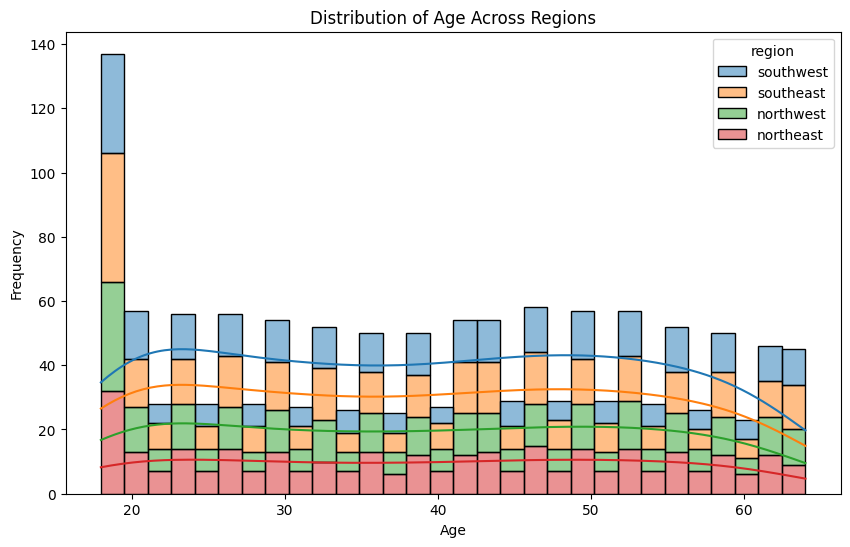

In [346]:
plt.figure(figsize=(10, 6))
sns.histplot(insurance_df, x='age', bins=30, kde=True, hue='region', multiple='stack')
plt.title('Distribution of Age Across Regions')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Average and Median Age in Our Data

In [347]:
# Calculates and returns the average age as a float value from the provided dataframe
def find_average_age(data):
    return data['age'].mean()

def find_median_age(data):
    return data['age'].median()

In [348]:
average_age = find_average_age(insurance_df)
median_age = find_median_age(insurance_df)
print(f"In our dataset, the average age is {average_age} while the median age is {median_age}")

In our dataset, the average age is 39.20702541106129 while the median age is 39.0


#### Relationship between Age and Smoking Behavior

In [384]:
# Calculate the percentage of smokers and non-smokers for each age group
age_group_smoking_percentage = insurance_df.groupby(['age_group', 'smoker'], observed=True).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)
age_group_smoking_percentage['no'] = (age_group_smoking_percentage['no']*100).round(2)
age_group_smoking_percentage['yes'] = (age_group_smoking_percentage['yes']*100).round(2)

# Print the resulting dataframe
print(age_group_smoking_percentage)

smoker        no    yes
age_group              
<20        78.10  21.90
20s        80.00  20.00
30s        77.43  22.57
40s        77.78  22.22
50s        84.87  15.13
60s        76.32  23.68


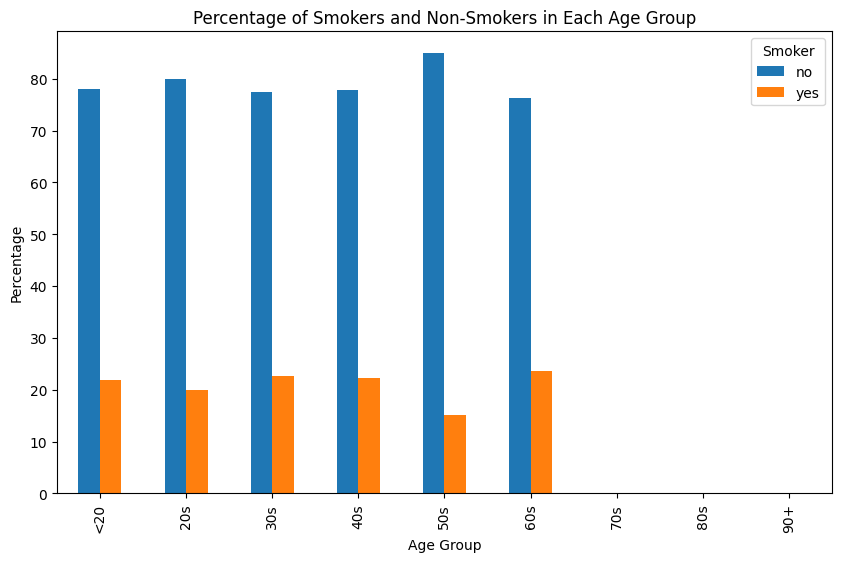

In [350]:
age_group_smoking_percentage.plot(kind='bar', figsize=(10, 6))
plt.title('Percentage of Smokers and Non-Smokers in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Smoker')
plt.show()

#### Impact of Age on BMI
<p><b>Note:</b> BMI is not necessarily an accurate predictor of health due to it reducing complex phenomena to a single number. Insurance companies use this BMI in their calculations, hence why we will use it in parts of our analysis, but would like to be clear of the skepticism around its relevance to our data and findings</p>

##### Distribution of BMI Across Age Groups

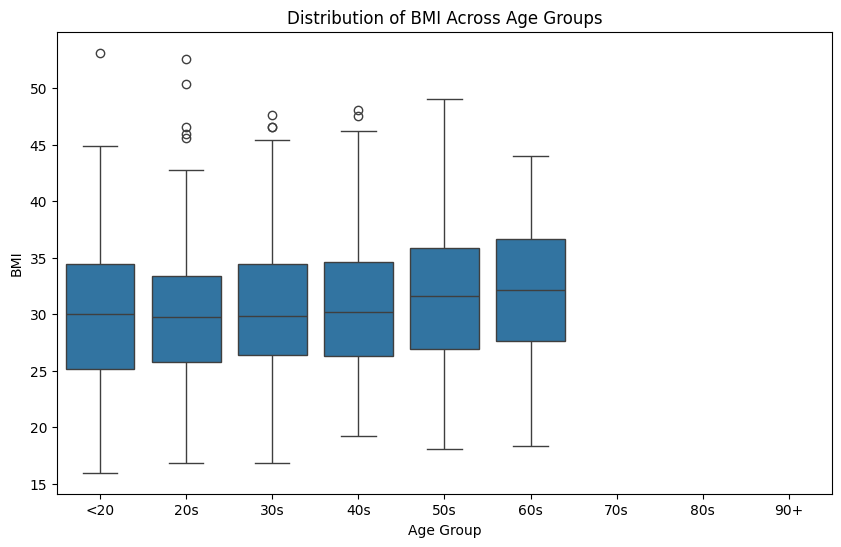

In [351]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='bmi', data=insurance_df)
plt.title('Distribution of BMI Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('BMI')
plt.show()

##### Distribution of Data by Region

In [352]:
region_percentage = insurance_df['region'].value_counts(normalize=True).reset_index()
region_percentage.columns = ['region', 'percentage']
print(region_percentage)

      region  percentage
0  southeast    0.272048
1  southwest    0.242900
2  northwest    0.242900
3  northeast    0.242152


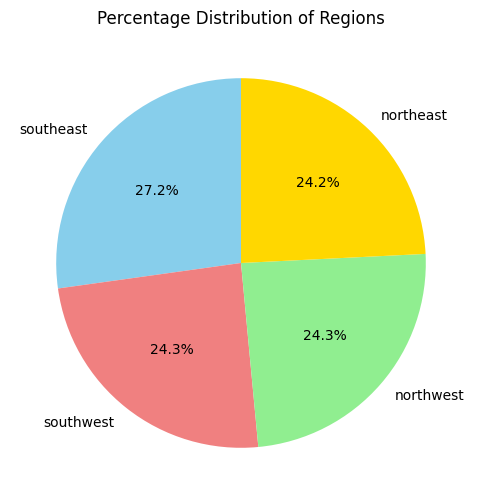

In [353]:
plt.figure(figsize=(6, 6))
plt.pie(region_percentage['percentage'], labels=region_percentage['region'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Percentage Distribution of Regions')
plt.show()

##### Percentage of Smokers and Non-Smokers

In [354]:
smoker_percentage = insurance_df['smoker'].value_counts(normalize=True).reset_index()
smoker_percentage.columns = ['smoker', 'percentage']
smoker_percentage['percentage'] = (smoker_percentage['percentage'] * 100).round(2)
print(smoker_percentage)

  smoker  percentage
0     no       79.52
1    yes       20.48


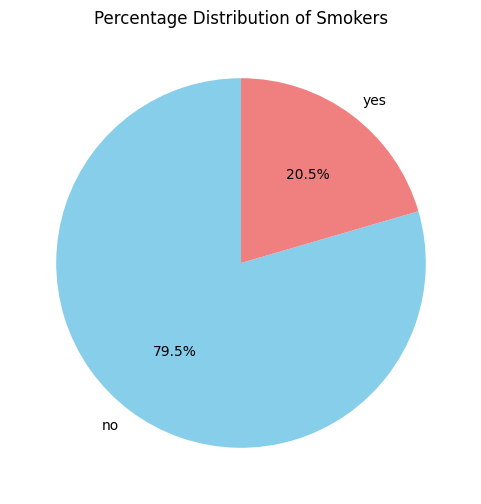

In [355]:
plt.figure(figsize=(6, 6))
plt.pie(smoker_percentage['percentage'], labels=smoker_percentage['smoker'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Percentage Distribution of Smokers')
plt.show()

##### Relationship Between Smoking and BMI

In [356]:
mean_bmi_smoker = insurance_df[insurance_df['smoker'] == 'yes']['bmi'].mean()
mean_bmi_non_smoker = insurance_df[insurance_df['smoker'] == 'no']['bmi'].mean()
correlation = insurance_df[['bmi', 'smoker']].replace({'yes': 1, 'no': 0}).corr().iloc[0, 1]

print(f"Mean BMI for Smokers: {mean_bmi_smoker:.2f}")
print(f"Mean BMI for Non-Smokers: {mean_bmi_non_smoker:.2f}")
print(f"Correlation between BMI and Smoking: {correlation:.2f}")

Mean BMI for Smokers: 30.71
Mean BMI for Non-Smokers: 30.65
Correlation between BMI and Smoking: 0.00


##### Average Amount of Children per Person

In [357]:
average_amount_children = insurance_df['children'].mean().round(2)
print(average_amount_children)

1.09


##### Distribution of Parents vs. Non-Parents

In [358]:
# Helper function for determining whether or not someone in our data is a parent during selection
def categorize_parental_status(num_children):
    if num_children > 0:
        return 'Parent'
    else:
        return 'Non-Parent'
    
new_df = insurance_df.assign(parental_status=insurance_df['children'].apply(categorize_parental_status))
parental_percentage = new_df['parental_status'].value_counts(normalize=True).reset_index()
parental_percentage.columns = ['parental_status', 'percentage']
parental_percentage['percentage'] = (parental_percentage['percentage'] * 100).round(2)

print(parental_percentage)

  parental_status  percentage
0          Parent        57.1
1      Non-Parent        42.9


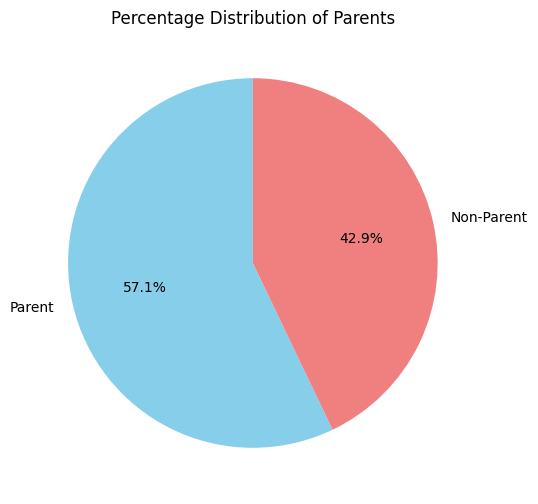

In [359]:
plt.figure(figsize=(6, 6))
plt.pie(parental_percentage['percentage'], labels=parental_percentage['parental_status'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Percentage Distribution of Parents')
plt.show()

##### Parental Age Distribution

In [385]:
parental_age = new_df.groupby('age_group', observed=True)['parental_status'].count().reset_index()
parental_age.columns = ['age_group', 'total_parents']
print(parental_age)

  age_group  total_parents
0       <20            137
1       20s            280
2       30s            257
3       40s            279
4       50s            271
5       60s            114


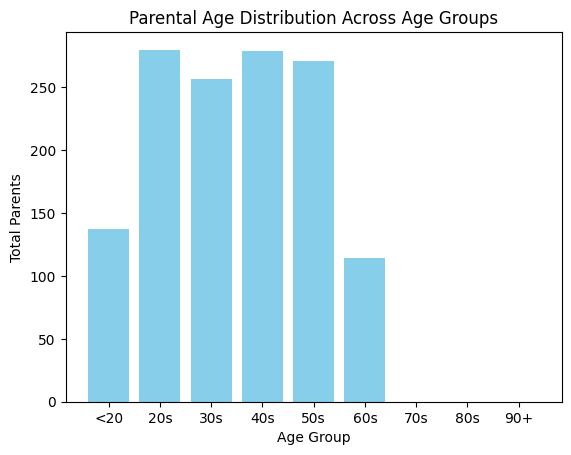

In [361]:
plt.bar(parental_age['age_group'], parental_age['total_parents'], color='skyblue')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Total Parents')
plt.title('Parental Age Distribution Across Age Groups')

# Show the plot
plt.show()

##### Relationship Between Parenthood and Smoking Habits

In [362]:
parent_smoking_relationship = pd.crosstab(new_df['parental_status'], new_df['smoker'])
print(parent_smoking_relationship)

smoker            no  yes
parental_status          
Non-Parent       459  115
Parent           605  159


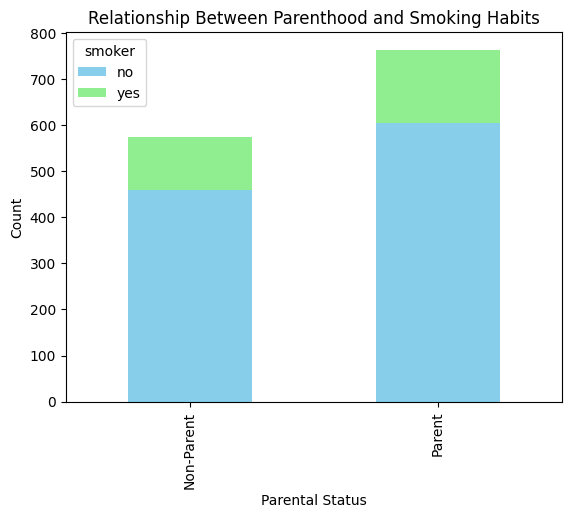

In [363]:
parent_smoking_relationship.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'])

# Add labels and title
plt.xlabel('Parental Status')
plt.ylabel('Count')
plt.title('Relationship Between Parenthood and Smoking Habits')

# Show the plot
plt.show()

##### BMI Average Across Age Groups

In [386]:
# Calculate the average BMI for each age group
average_bmi_by_age_group = insurance_df.groupby('age_group', observed=True)['bmi'].mean().round(2).reset_index()

# Print the resulting DataFrame
print(average_bmi_by_age_group)

  age_group    bmi
0       <20  29.97
1       20s  29.79
2       30s  30.44
3       40s  30.71
4       50s  31.51
5       60s  32.02


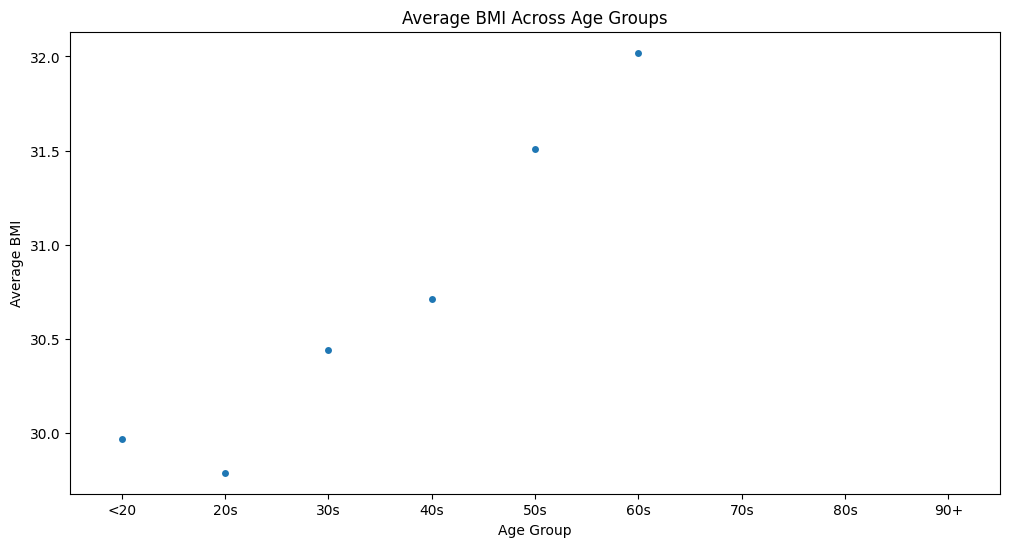

In [365]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='age_group', y='bmi', data=average_bmi_by_age_group, size=5)
plt.title('Average BMI Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.show()

##### Sex Distribution in our Data

In [387]:
sex_distribution = insurance_df.groupby('sex', observed=True).size().reset_index(name='total')
sex_distribution['percentage'] = ((sex_distribution['total'] / sex_distribution['total'].sum()) * 100).round(2)

print(sex_distribution)

      sex  total  percentage
0  female    662       49.48
1    male    676       50.52


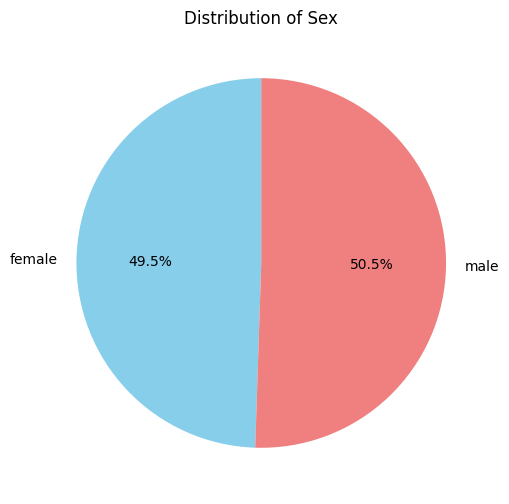

In [367]:
plt.figure(figsize=(6, 6))
plt.pie(sex_distribution['percentage'], labels=sex_distribution['sex'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Sex')
plt.show()

##### Relationship Between Sex and BMI

In [388]:
sex_bmi_relationship = insurance_df.groupby('sex', observed=True)['bmi'].mean().round(2).reset_index()

print(sex_bmi_relationship)

      sex    bmi
0  female  30.38
1    male  30.94


## Insurance Cost Analysis

##### Insurance Cost Range in our Data

In [369]:
min_cost = insurance_df['charges'].min()
average_cost = insurance_df['charges'].mean().round(2)
median_cost = insurance_df['charges'].median().round(2)
max_cost = insurance_df['charges'].max().round(2)
print(f"In our dataset:\nThe lowest insurance cost is {min_cost} dollars\nThe average cost is {average_cost} dollars\nThe median cost is {median_cost} dollars\nThe highest cost is {max_cost} dollars")

In our dataset:
The lowest insurance cost is 1121.87 dollars
The average cost is 13270.42 dollars
The median cost is 9382.03 dollars
The highest cost is 63770.43 dollars


##### Insurance Cost Range Across Age Groups

In [389]:
cost_by_age_group = insurance_df.groupby("age_group", observed=True)["charges"].agg(["mean", "median", "min", "max"]).round(2).reset_index()
cost_by_age_group.columns = ['age_group', 'average_cost', 'median_cost', 'lowest_cost', 'highest_cost']
print(cost_by_age_group)

  age_group  average_cost  median_cost  lowest_cost  highest_cost
0       <20       8407.35      2138.07      1121.87      39722.75
1       20s       9561.75      3560.26      1391.53      51194.56
2       30s      11738.78      6082.40      3260.20      58571.07
3       40s      14399.20      8606.22      5415.66      62592.87
4       50s      16495.23     11729.68      8442.67      63770.43
5       60s      21248.02     14255.40     12142.58      52590.83


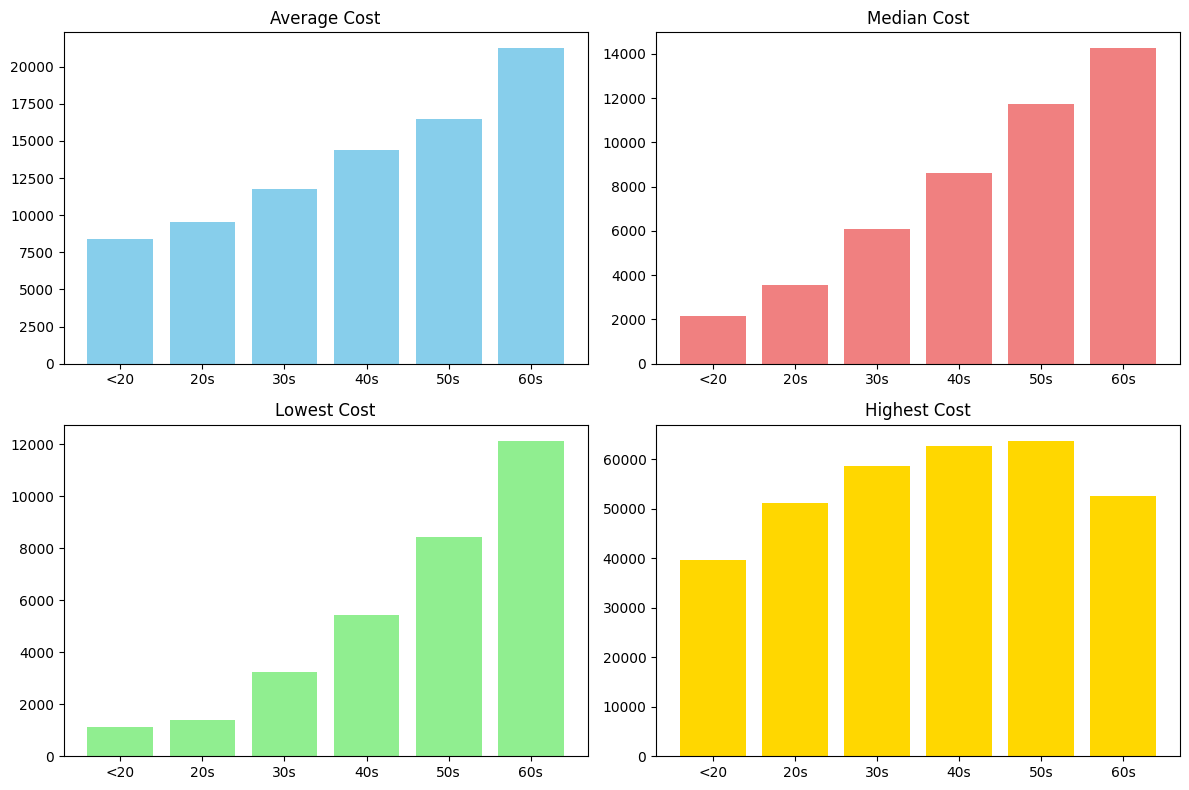

In [371]:
plt.figure(figsize=(12, 8))

# Bar chart for average cost
plt.subplot(2, 2, 1)
plt.bar(cost_by_age_group['age_group'], cost_by_age_group['average_cost'], color='skyblue')
plt.title('Average Cost')

# Bar chart for median cost
plt.subplot(2, 2, 2)
plt.bar(cost_by_age_group['age_group'], cost_by_age_group['median_cost'], color='lightcoral')
plt.title('Median Cost')

# Bar chart for lowest cost
plt.subplot(2, 2, 3)
plt.bar(cost_by_age_group['age_group'], cost_by_age_group['lowest_cost'], color='lightgreen')
plt.title('Lowest Cost')

# Bar chart for highest cost
plt.subplot(2, 2, 4)
plt.bar(cost_by_age_group['age_group'], cost_by_age_group['highest_cost'], color='gold')
plt.title('Highest Cost')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### Insurance Cost Range Across Regions

In [390]:
cost_by_region = insurance_df.groupby("region", observed=True)["charges"].agg(["mean", "median", "min", "max"]).round(2).reset_index()
cost_by_region.columns = ['region', 'average_cost', 'median_cost', 'lowest_cost', 'highest_cost']
print(cost_by_region)

      region  average_cost  median_cost  lowest_cost  highest_cost
0  northeast      13406.38     10057.65      1694.80      58571.07
1  northwest      12417.58      8965.80      1621.34      60021.40
2  southeast      14735.41      9294.13      1121.87      63770.43
3  southwest      12346.94      8798.59      1241.56      52590.83


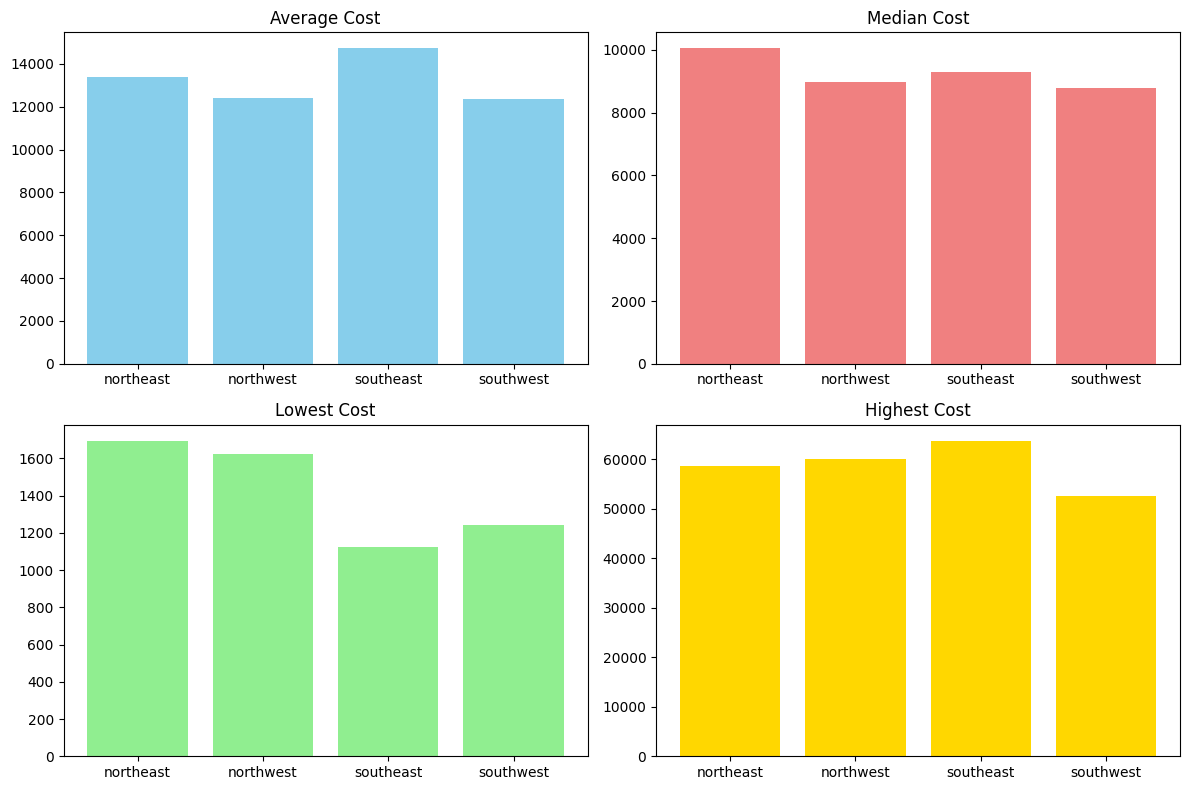

In [373]:
plt.figure(figsize=(12, 8))

# Bar chart for average cost
plt.subplot(2, 2, 1)
plt.bar(cost_by_region['region'], cost_by_region['average_cost'], color='skyblue')
plt.title('Average Cost')

# Bar chart for median cost
plt.subplot(2, 2, 2)
plt.bar(cost_by_region['region'], cost_by_region['median_cost'], color='lightcoral')
plt.title('Median Cost')

# Bar chart for lowest cost
plt.subplot(2, 2, 3)
plt.bar(cost_by_region['region'], cost_by_region['lowest_cost'], color='lightgreen')
plt.title('Lowest Cost')

# Bar chart for highest cost
plt.subplot(2, 2, 4)
plt.bar(cost_by_region['region'], cost_by_region['highest_cost'], color='gold')
plt.title('Highest Cost')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### Insurance Cost Range Between Smoking Status'

In [391]:
cost_by_smoking_status = insurance_df.groupby('smoker', observed=True)['charges'].agg(["mean", "median", "min", "max"]).round(2).reset_index()
cost_by_smoking_status.columns = ['smoking_status', 'average_cost', 'median_cost', 'lowest_cost', 'highest_cost']
print(cost_by_smoking_status)

  smoking_status  average_cost  median_cost  lowest_cost  highest_cost
0             no       8434.27      7345.40      1121.87      36910.61
1            yes      32050.23     34456.35     12829.46      63770.43


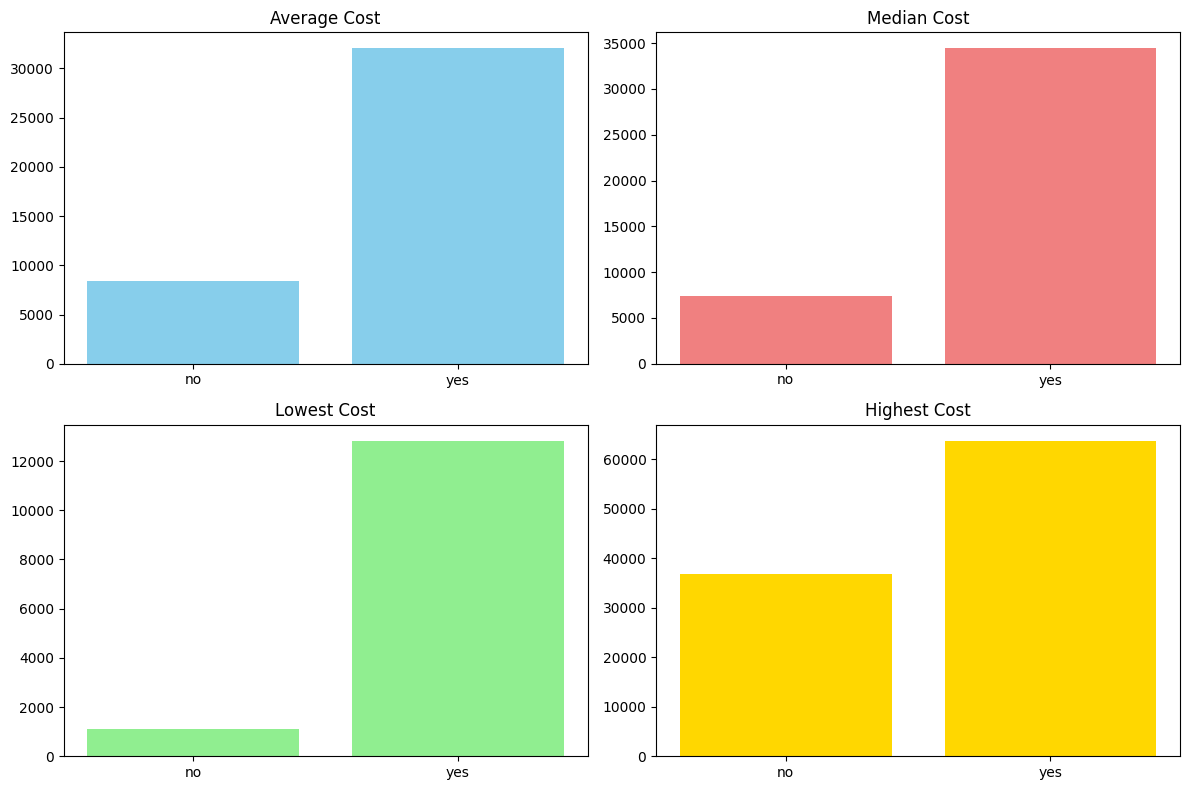

In [375]:
plt.figure(figsize=(12, 8))

# Bar chart for average cost
plt.subplot(2, 2, 1)
plt.bar(cost_by_smoking_status['smoking_status'], cost_by_smoking_status['average_cost'], color='skyblue')
plt.title('Average Cost')

# Bar chart for median cost
plt.subplot(2, 2, 2)
plt.bar(cost_by_smoking_status['smoking_status'], cost_by_smoking_status['median_cost'], color='lightcoral')
plt.title('Median Cost')

# Bar chart for lowest cost
plt.subplot(2, 2, 3)
plt.bar(cost_by_smoking_status['smoking_status'], cost_by_smoking_status['lowest_cost'], color='lightgreen')
plt.title('Lowest Cost')

# Bar chart for highest cost
plt.subplot(2, 2, 4)
plt.bar(cost_by_smoking_status['smoking_status'], cost_by_smoking_status['highest_cost'], color='gold')
plt.title('Highest Cost')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### Average Insurance Cost Across Amount of Children

In [392]:
cost_by_child = insurance_df.groupby("children", observed=True)['charges'].agg(["mean", "median", "min", "max"]).round().reset_index()
cost_by_child.columns = ['amount_of_children', 'average_cost', 'median_cost', 'lowest_cost', 'highest_cost']
print(cost_by_child)

   amount_of_children  average_cost  median_cost  lowest_cost  highest_cost
0                   0       12366.0       9857.0       1122.0       63770.0
1                   1       12731.0       8484.0       1711.0       58571.0
2                   2       15074.0       9265.0       2304.0       49578.0
3                   3       15355.0      10601.0       3443.0       60021.0
4                   4       13851.0      11034.0       4505.0       40182.0
5                   5        8786.0       8590.0       4688.0       19023.0


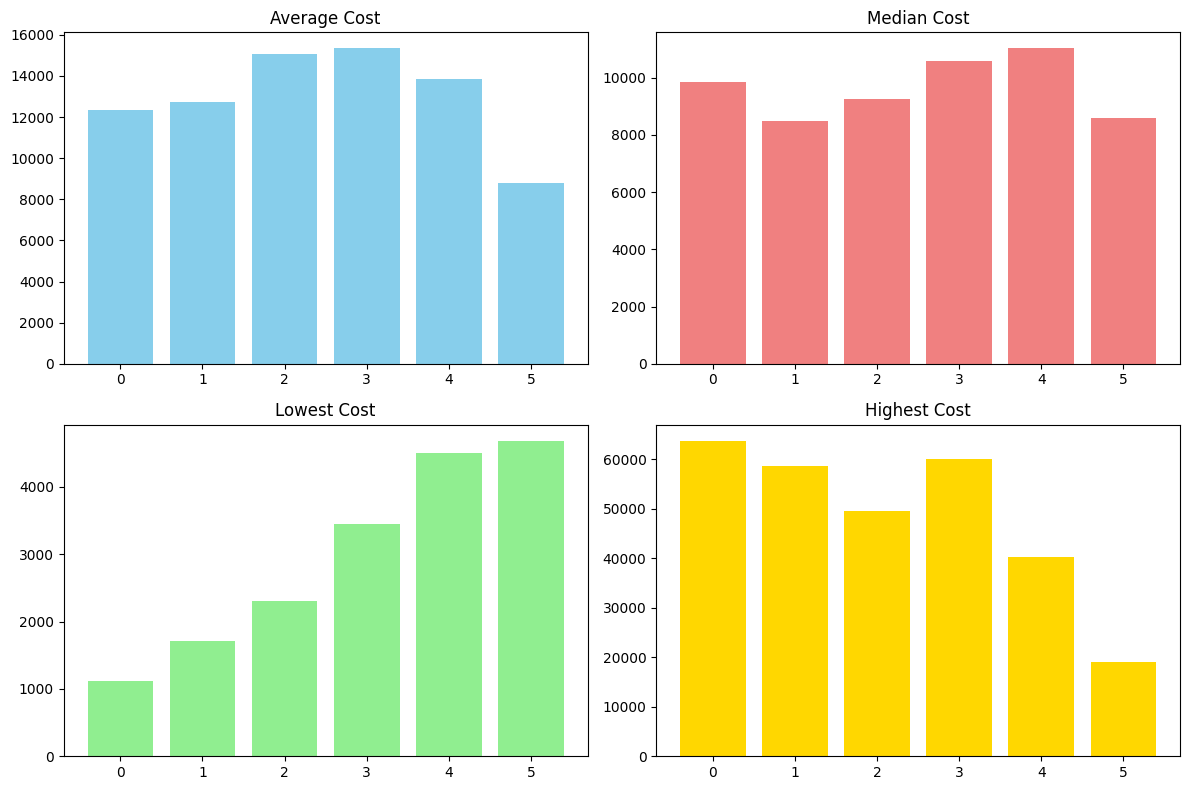

In [377]:
plt.figure(figsize=(12, 8))

# Bar chart for average cost
plt.subplot(2, 2, 1)
plt.bar(cost_by_child['amount_of_children'], cost_by_child['average_cost'], color='skyblue')
plt.title('Average Cost')

# Bar chart for median cost
plt.subplot(2, 2, 2)
plt.bar(cost_by_child['amount_of_children'], cost_by_child['median_cost'], color='lightcoral')
plt.title('Median Cost')

# Bar chart for lowest cost
plt.subplot(2, 2, 3)
plt.bar(cost_by_child['amount_of_children'], cost_by_child['lowest_cost'], color='lightgreen')
plt.title('Lowest Cost')

# Bar chart for highest cost
plt.subplot(2, 2, 4)
plt.bar(cost_by_child['amount_of_children'], cost_by_child['highest_cost'], color='gold')
plt.title('Highest Cost')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### Average Insurance Cost Across BMI Groups

In [393]:
# Calculate the average insurance cost for each BMI group
cost_by_bmi_group = insurance_df.groupby('bmi_group', observed=True)['charges'].agg(["mean", "median", "min", "max"]).round(2).reset_index()
cost_by_bmi_group.columns = ['bmi_group', 'average_cost', 'median_cost', 'lowest_cost', 'highest_cost']
print(cost_by_bmi_group)

       bmi_group  average_cost  median_cost  lowest_cost  highest_cost
0    Underweight       8657.62      6640.54      1621.34      32734.19
1  Normal Weight      10435.44      8604.15      1121.87      35069.37
2     Overweight      10997.80      8659.38      1252.41      38245.59
3        Obese I      14429.42      9563.03      1131.51      62592.87
4       Obese II      17022.26     11264.54      1141.45      58571.07
5      Obese III      16784.62      9748.91      1146.80      63770.43


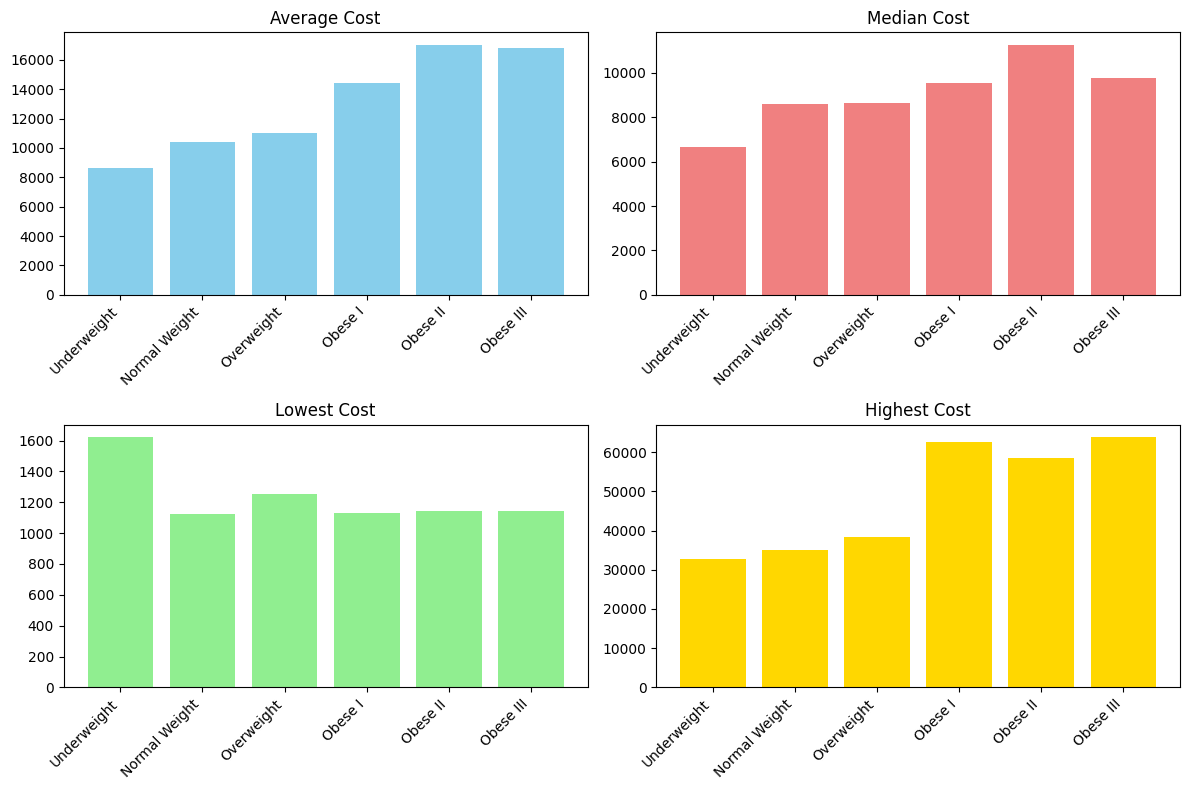

In [395]:
plt.figure(figsize=(12, 8))

# Bar chart for average cost
plt.subplot(2, 2, 1)
plt.bar(cost_by_bmi_group['bmi_group'], cost_by_bmi_group['average_cost'], color='skyblue')
plt.title('Average Cost')
plt.xticks(rotation=45, ha='right')

# Bar chart for median cost
plt.subplot(2, 2, 2)
plt.bar(cost_by_bmi_group['bmi_group'], cost_by_bmi_group['median_cost'], color='lightcoral')
plt.title('Median Cost')
plt.xticks(rotation=45, ha='right')

# Bar chart for lowest cost
plt.subplot(2, 2, 3)
plt.bar(cost_by_bmi_group['bmi_group'], cost_by_bmi_group['lowest_cost'], color='lightgreen')
plt.title('Lowest Cost')
plt.xticks(rotation=45, ha='right')

# Bar chart for highest cost
plt.subplot(2, 2, 4)
plt.bar(cost_by_bmi_group['bmi_group'], cost_by_bmi_group['highest_cost'], color='gold')
plt.title('Highest Cost')
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### Average Insurance Cost Across Sex

In [394]:
cost_by_sex = insurance_df.groupby('sex', observed=True)['charges'].agg(["mean", "median", "min", "max"]).round(2).reset_index()
cost_by_sex.columns = ['sex', 'average_cost', 'median_cost', 'lowest_cost', 'highest_cost']
print(cost_by_sex)

      sex  average_cost  median_cost  lowest_cost  highest_cost
0  female      12569.58      9412.96      1607.51      63770.43
1    male      13956.75      9369.62      1121.87      62592.87


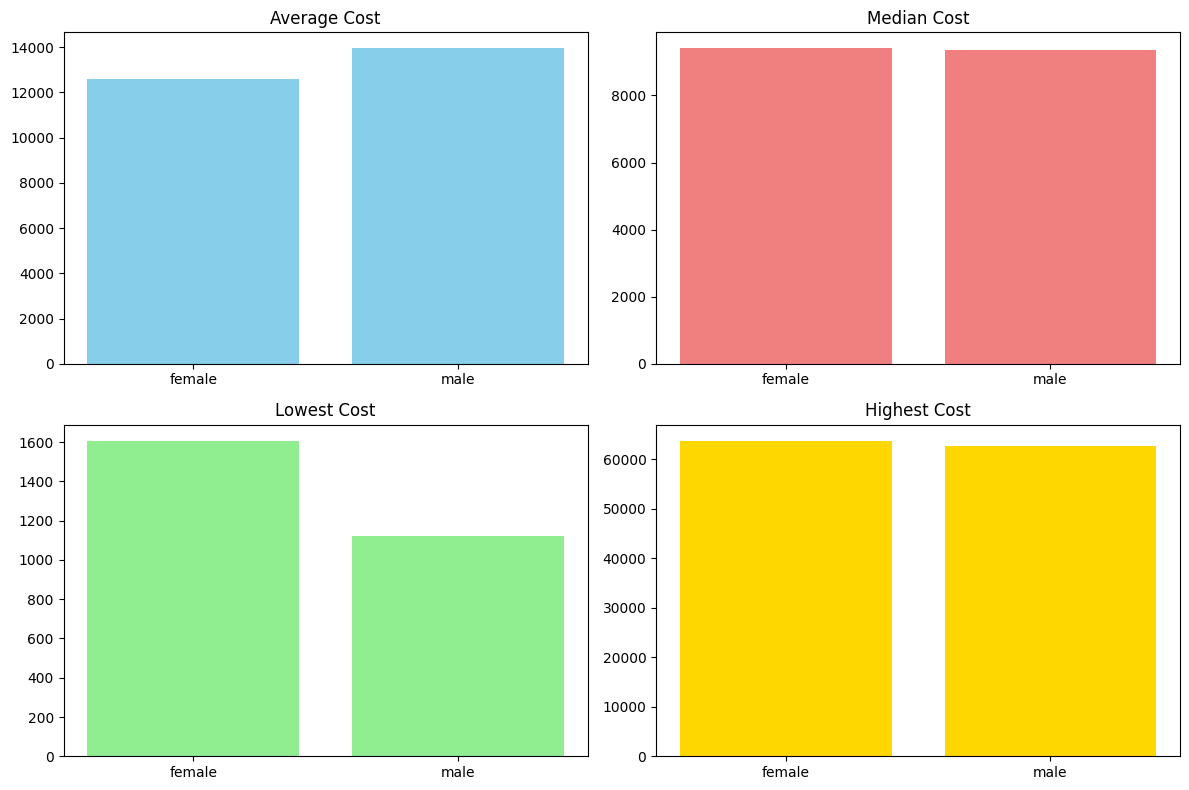

In [381]:
plt.figure(figsize=(12, 8))

# Bar chart for average cost
plt.subplot(2, 2, 1)
plt.bar(cost_by_sex['sex'], cost_by_sex['average_cost'], color='skyblue')
plt.title('Average Cost')

# Bar chart for median cost
plt.subplot(2, 2, 2)
plt.bar(cost_by_sex['sex'], cost_by_sex['median_cost'], color='lightcoral')
plt.title('Median Cost')

# Bar chart for lowest cost
plt.subplot(2, 2, 3)
plt.bar(cost_by_sex['sex'], cost_by_sex['lowest_cost'], color='lightgreen')
plt.title('Lowest Cost')

# Bar chart for highest cost
plt.subplot(2, 2, 4)
plt.bar(cost_by_sex['sex'], cost_by_sex['highest_cost'], color='gold')
plt.title('Highest Cost')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()